# Aufgabe zu Daten Timeouts:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom
import scipy.stats as st

In [ ]:
df = pd.read_csv("./Daten/Timeouts.csv")
df

,day,total,timeout
0,0,12931,41
1,1,8544,17
2,2,7565,18
3,3,6759,20
4,4,9570,13
5,5,12091,40
6,6,4352,6
7,7,10435,28
8,8,8491,29
9,9,6540,21


   day  total  timeout      Freq        SE
0    0  12931       41  0.003171  0.000440
1    1   8544       17  0.001990  0.000541
2    2   7565       18  0.002379  0.000575
3    3   6759       20  0.002959  0.000608
4    4   9570       13  0.001358  0.000511


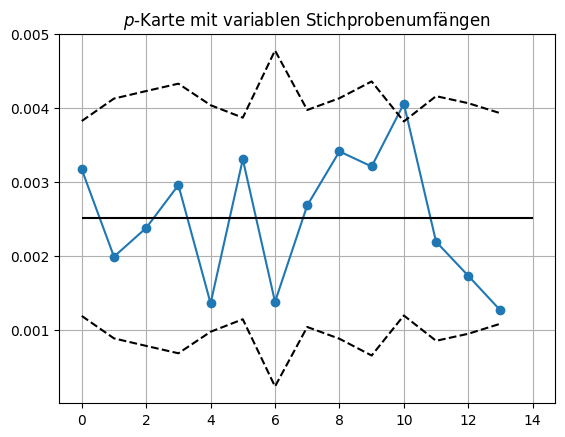

In [3]:
# Anteil der defekten PCs
df["Freq"] = df["timeout"] / df["total"]

# Schätzung des Mittelwertes
p_hat = df["Freq"].mean()

# Schätzung der Streuung (variabel!)
# sigma
df["SE"] = np.sqrt((p_hat * (1 - p_hat)) / df["total"])
print(df.head())

n = df.shape[0]
C = p_hat
U = C + 3 * df["SE"]
L = C - 3 * df["SE"]

plt.plot(df["Freq"], "-o")
plt.plot(L, "--", color="black")
plt.hlines(C, xmin=0, xmax=n, linestyle="solid", colors="black")
plt.plot(U, "--", color="black")
plt.title(r"$p$-Karte mit variablen Stichprobenumfängen")
plt.grid()
plt.show()

Der Prozess geht über die Oberegrenze was bedeutet das er nicht unter Kontrolle ist, es sollte der Grund ermittelt werden. Es sollte jedoch auch Analysiert werden wiso es Teilweise kleinere Fehleranteile gibt.

In [4]:
k = df["Freq"]*df["total"]
k.min()

np.float64(6.0)

$\hat{p} \cdot m > 5$
Es kann Normalverteilung angenommen werden.

## Binominalverteilung:

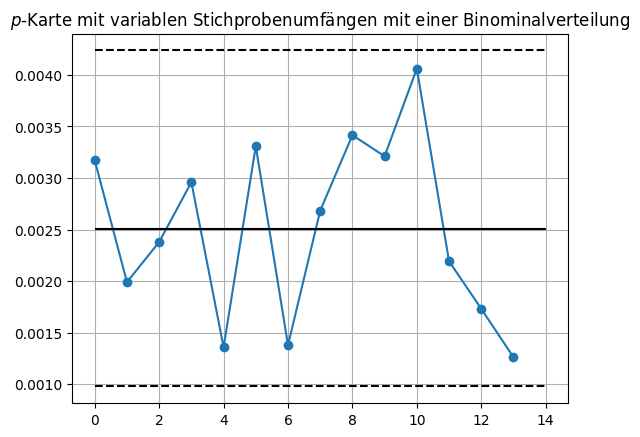

In [5]:
alpha = 0.0027
m  = round(df["total"].mean(),0)

# 2. binomial approximation
process_model = binom(m, p_hat)

# possible number of failures: 0 .. 50
numbers = np.arange(m+1)


mask_low = process_model.cdf(numbers) <= alpha/2
L_star = np.max(numbers[mask_low])

# indicator for right side
mask_high = (1-process_model.cdf(numbers)) <= alpha/2
U_star = np.min(numbers[mask_high])

# bounds on the relative frequency
Lbc = L_star/m
Ubc = U_star/m


plt.plot(df["Freq"], "-o")
plt.hlines(Lbc, xmin=0, xmax=n, linestyles="--", color="black")
plt.hlines(C, xmin=0, xmax=n, linestyle="solid", colors="black")
plt.hlines(Ubc, xmin=0, xmax=n, linestyles="--", color="black")
plt.title(r"$p$-Karte mit variablen Stichprobenumfängen mit einer Binominalverteilung")
plt.grid()
plt.show()

In [6]:
m  = df["total"]
m[1]

np.int64(8544)

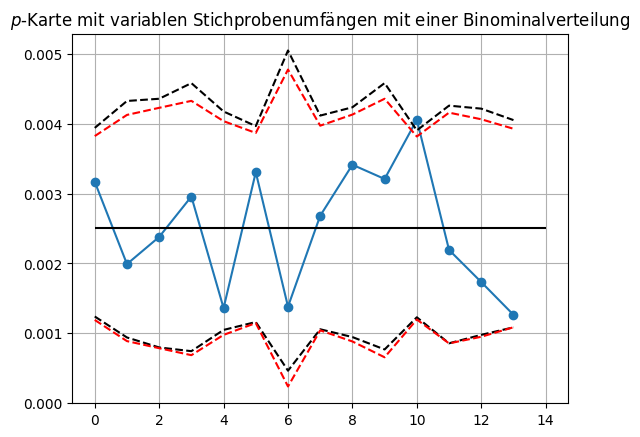

In [7]:
alpha = 0.0027
m  = df["total"]

U_st  = []
L_st = []
for i in range(len(m)):
	# 2. binomial approximation
	process_model = binom(m[i], p_hat)

	# possible number of failures: 0 .. 50
	numbers = np.arange(m[i]+1)


	mask_low = process_model.cdf(numbers) <= alpha/2
	L_star = np.max(numbers[mask_low])
	L_st.append(L_star)

	# indicator for right side
	mask_high = (1-process_model.cdf(numbers)) <= alpha/2
	U_star = np.min(numbers[mask_high])
	U_st.append(U_star)

# bounds on the relative frequency
Lb = L_st[:]/m[:]
Ub = U_st[:]/m[:]


plt.plot(df["Freq"], "-o")
plt.plot(Lb, "--", color="black")
plt.plot(L, "--", color="red")
plt.hlines(C, xmin=0, xmax=n, linestyle="solid", colors="black")
plt.plot(Ub,"--", color="black")
plt.plot(U, "--", color="red")
plt.title(r"$p$-Karte mit variablen Stichprobenumfängen mit einer Binominalverteilung")
plt.grid()
plt.show()